In [21]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_sols_mutations = pd.read_csv('csvs/num_solutions_5xn.csv')
df_sols_cells = pd.read_csv('csvs/num_solutions_mx5.csv')
df_time_mutations = pd.read_csv('csvs/metrics_5xn.csv')
df_time_cells = pd.read_csv('csvs/metrics_mx5.csv')


In [23]:
df_sols_mutations = df_sols_mutations[df_sols_mutations['power_of_two'] != -1]
df_sols_cells = df_sols_cells[df_sols_cells['power_of_two'] != -1]


In [24]:
df_sols_mutations['loss'] = df_sols_mutations.apply(lambda a: float(a['filename'].split('loss')[1].split('_')[0]), axis=1)
df_sols_cells['loss'] = df_sols_cells.apply(lambda a: float(a['filename'].split('loss')[1].split('_')[0]), axis=1)


In [25]:
df_sols_mutations['raw_count'] = df_sols_mutations.apply(lambda a: a['prefix']*2**a['power_of_two'], axis=1)
df_sols_cells['raw_count'] = df_sols_mutations.apply(lambda a: a['prefix']*2**a['power_of_two'], axis=1)


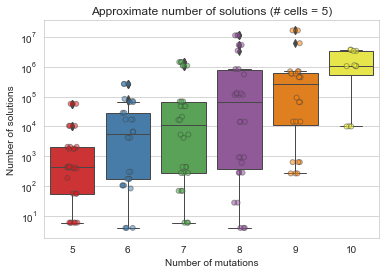

In [26]:
sns.set_style("whitegrid")

sns.boxplot(x="n", y="raw_count", data=df_sols_mutations, palette='Set1', linewidth=1.0)
ax = sns.stripplot(data=df_sols_mutations, x="n", y="raw_count",palette='Set1', alpha=.5, dodge=True, linewidth=1, jitter=.1)

ax.set_yscale('log')

plt.title('Approximate number of solutions (# cells = 5)')
plt.suptitle('')
plt.xlabel('Number of mutations')
plt.ylabel('Number of solutions')
plt.show()

ax.figure.savefig("figures/num_solutions_mutations.png", dpi=1200)

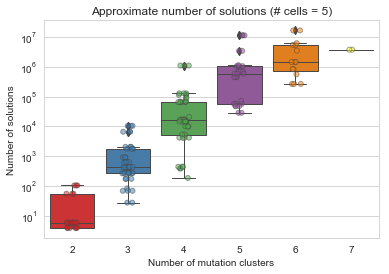

In [27]:
sns.set_style("whitegrid")

sns.boxplot(x="num_mutation_clusters", y="raw_count", data=df_sols_mutations, palette='Set1', linewidth=1.0)
ax = sns.stripplot(data=df_sols_mutations, x="num_mutation_clusters",y="raw_count", alpha=.5, palette='Set1', dodge=True, linewidth=1, jitter=.1)

ax.set_yscale('log')

plt.title('Approximate number of solutions (# cells = 5)')
plt.suptitle('')
plt.xlabel('Number of mutation clusters')
plt.ylabel('Number of solutions')
plt.show()

ax.figure.savefig("figures/num_solutions_mutation_clusters.png", dpi=1200)

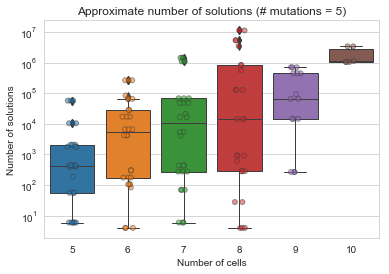

In [28]:
sns.set_style("whitegrid")

sns.boxplot(x="m", y="raw_count", data=df_sols_cells,linewidth=1.0)
ax = sns.stripplot(data=df_sols_cells, x="m",y="raw_count", alpha=.5,dodge=True, linewidth=1, jitter=.1)

ax.set_yscale('log')

plt.title('Approximate number of solutions (# mutations = 5)')
plt.suptitle('')
plt.xlabel('Number of cells')
plt.ylabel('Number of solutions')
plt.show()

ax.figure.savefig("figures/num_solutions_cells.png", dpi=1200)

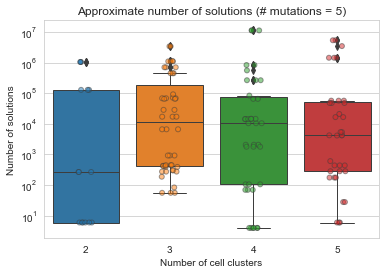

In [29]:
sns.set_style("whitegrid")

sns.boxplot(x="num_cell_clusters", y="raw_count", data=df_sols_cells, linewidth=1.0)
ax = sns.stripplot(data=df_sols_cells, x="num_cell_clusters", y="raw_count", alpha=.5, dodge=True, linewidth=1, jitter=.1)

ax.set_yscale('log')

plt.title('Approximate number of solutions (# mutations = 5)')
plt.suptitle('')
plt.xlabel('Number of cell clusters')
plt.ylabel('Number of solutions')
plt.show()

ax.figure.savefig("figures/num_solutions_cell_clusters.png", dpi=1200)

In [30]:
df_time_mutations = df_time_mutations[df_time_mutations['num_samples'] != -1]
df_time_mutations['time_per_sample'] = df_time_mutations['unigen_time'] / df_time_mutations['num_samples']

df_time_cells = df_time_cells[df_time_cells['num_samples'] != -1]
df_time_cells['time_per_sample'] = df_time_cells['unigen_time'] / df_time_cells['num_samples']


In [31]:
df_time_mutations['loss'] = df_time_mutations.apply(lambda a: float(a['filename'].split('loss')[1].split('_')[0]), axis=1)
df_time_cells['loss'] = df_time_cells.apply(lambda a: float(a['filename'].split('loss')[1].split('_')[0]), axis=1)


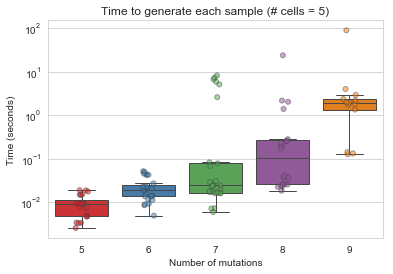

In [32]:
sns.boxplot(x="n", y="time_per_sample", data=df_time_mutations,palette='Set1', linewidth=1.0, showfliers = False)
ax = sns.stripplot(data=df_time_mutations, x="n",y="time_per_sample", alpha=.5,palette='Set1', dodge=True, linewidth=1, jitter=.1)
ax.set_yscale('log')

plt.title('Time to generate each sample (# cells = 5)')
plt.suptitle('')
plt.xlabel('Number of mutations')
plt.ylabel('Time (seconds)')
plt.show()

ax.figure.savefig("figures/mutation_time_sample.png", dpi=1200)

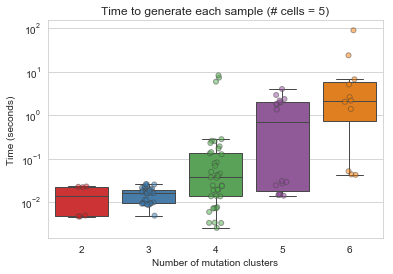

In [33]:
sns.boxplot(x="num_mutation_clusters", y="time_per_sample", data=df_time_mutations, palette='Set1', linewidth=1.0, showfliers = False)
ax = sns.stripplot(data=df_time_mutations, x="num_mutation_clusters",y="time_per_sample", alpha=.5, palette='Set1',dodge=True, linewidth=1, jitter=.1)
ax.set_yscale('log')

plt.title('Time to generate each sample (# cells = 5)')
plt.suptitle('')
plt.xlabel('Number of mutation clusters')
plt.ylabel('Time (seconds)')
plt.show()

ax.figure.savefig("figures/mutation_clusters_time_sample.png", dpi=1200)

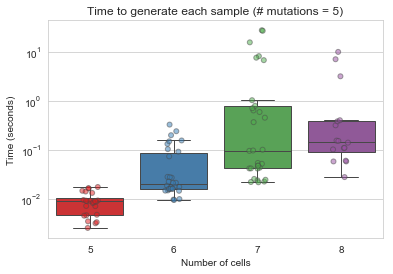

In [34]:
sns.boxplot(x="m", y="time_per_sample", data=df_time_cells, palette='Set1', linewidth=1.0, showfliers = False)
ax = sns.stripplot(data=df_time_cells, x="m",y="time_per_sample", alpha=.5, palette='Set1', dodge=True, linewidth=1, jitter=.1)
ax.set_yscale('log')

plt.title('Time to generate each sample (# mutations = 5)')
plt.suptitle('')
plt.xlabel('Number of cells')
plt.ylabel('Time (seconds)')
plt.show()

ax.figure.savefig("figures/cell_time_sample.png", dpi=1200)

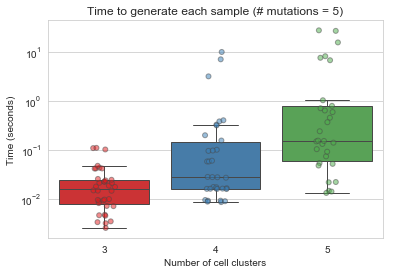

In [35]:
sns.boxplot(x="num_cell_clusters", y="time_per_sample", data=df_time_cells, palette='Set1', linewidth=1.0, showfliers = False)
ax = sns.stripplot(data=df_time_cells, x="num_cell_clusters",y="time_per_sample", alpha=.5, palette='Set1', dodge=True, linewidth=1, jitter=.1)
ax.set_yscale('log')

plt.title('Time to generate each sample (# mutations = 5)')
plt.suptitle('')
plt.xlabel('Number of cell clusters')
plt.ylabel('Time (seconds)')
plt.show()

ax.figure.savefig("figures/cell_cluster_time_sample.png", dpi=1200)


In [36]:
dropped_df = df_sols_mutations.drop(columns=['m','n','num_cell_clusters','num_mutation_clusters','num_variables','num_clauses','formula_gen_time','prefix','power_of_two', 'loss'])

dropped_df_other = df_time_mutations.drop(columns=['m','n','num_cell_clusters','num_mutation_clusters','num_variables','num_clauses','formula_gen_time', 'unigen_time','num_samples'])


In [37]:
joined_df = dropped_df.set_index('filename').join(dropped_df_other.set_index('filename'), lsuffix='_caller', rsuffix='_other')


In [38]:
joined_df = joined_df.dropna().reset_index()


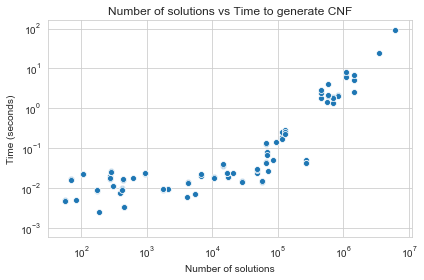

In [39]:
ax = sns.scatterplot(x="raw_count", y="time_per_sample", data=joined_df, palette='Set1')

ax.set_xscale('log')
ax.set_yscale('log')

plt.title('Number of solutions vs Time to generate CNF')
plt.xlabel('Number of solutions')
plt.ylabel('Time (seconds)')
plt.tight_layout()

ax.figure.savefig("figures/solutions_vs_time.png", dpi=1200)


In [40]:
df_uniformity = pd.read_csv('uniformity.csv')


In [ ]:
sns.boxplot(x='is_min', y="freq", data=df_uniformity, linewidth=1.0, showfliers = False)
ax = sns.stripplot(data=df_time_cells, x='is_min', y="freq", alpha=.5, dodge=True, linewidth=1, jitter=.1)

plt.title('')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('sampling uniformity ratio')
plt.show()

ax.figure.savefig("figures/uniformity.png", dpi=1200)
